In [1]:
import sys
import os
import Simulations_COVID19 as SCovid19
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

No version information file '.version' found


In [ ]:
'''
Load and collect data for the web,
fit the phenom models and save the info 
for the web.
'''

####### SET-UP #######

samples = 3000
number_days = 100

list_countries = ['Spain','Italy','US','France','United Kingdom','Germany','Netherlands','Japan','Korea, South']

folder_html = './tables/'
folder_images = './images/'

os.mkdir(folder_html)
os.mkdir(folder_images)

Dates = {'Spain':{'3/8/20':['M8','-.'],'3/14/20':['Lockdown','--']},
'Italy':{'3/9/20':['Lockdown','--']},
'Hubai':{'1/23/20':['Lockdown','--']}}

####### LOAD #######

dataloader = SCovid19.data_loader()
dataloader.load_countries(flag_full_list = True)

####### TABLE ONE #######

dataloader.date_to_html(name = 'date', folder = folder_html)
dataloader.compile_table_to_html(name = 'memory', folder = folder_html)

####### MAPS #######

for field in ['Confirmed','Recovered','Deaths']:
    SCovid19.utilitis.plotly_write_html(dataloader.show_map(field = 'Deaths', exept = ['China']), name = 'map'+field+'.html', folder = folder_html) 

####### PERCENT #######
    
plt.figure(figsize=(int(np.ceil(len(list_countries))/4*7),7))
dataloader.plot_percents(list_countries)
SCovid19.utilitis.plot_to_png(name = 'percents', folder = folder_images)

####### PHENOM #######

phenomsirs = SCovid19.phenom_simulator(countries = list_countries, data_table = dataloader.data)
for method in ['log-model','gompertz-model']:
    print(method)
    _ = phenomsirs.sample_posterior_predictive_model(method = method, field = 'Deaths', samples = samples, number_days = number_days, n_steps=2)
    _ = phenomsirs.plot_results(method = method, flag_res = False, Dates = Dates)
    SCovid19.utilitis.plot_to_png(name = method+'-curve', folder = folder_images, loc = 'upper center', bbox_to_anchor=(0.5, -0.14), fancybox=True, shadow=True, ncol=6)
    phenomsirs.traces_to_multivariateGrid(method = 'log-model')
    SCovid19.utilitis.plot_to_png(name = method+'-multivariateGrid', folder = folder_images, loc = 'upper center', bbox_to_anchor=(0.5, -0.14), fancybox=True, shadow=True, ncol=6)
    


log-model
phenom_constrains: {'c1M': 1, 'c1s': 1, 'c2M': 100, 'c2s': 100, 'c3M': 10000, 'c3s': 20000} 



Sample initial stage: ...
Stage:   0 Beta: 0.000 Steps:   2 Acce: 1.000
Stage:   1 Beta: 0.000 Steps:   2 Acce: 0.227
Stage:   2 Beta: 0.000 Steps:   2 Acce: 0.242
Stage:   3 Beta: 0.000 Steps:   2 Acce: 0.346
Stage:   4 Beta: 0.000 Steps:   2 Acce: 0.447
Stage:   5 Beta: 0.000 Steps:   2 Acce: 0.452
Stage:   6 Beta: 0.000 Steps:   2 Acce: 0.405
Stage:   7 Beta: 0.000 Steps:   2 Acce: 0.418
Stage:   8 Beta: 0.000 Steps:   2 Acce: 0.388
Stage:   9 Beta: 0.000 Steps:   2 Acce: 0.422
Stage:  10 Beta: 0.000 Steps:   2 Acce: 0.359
Stage:  11 Beta: 0.000 Steps:   2 Acce: 0.262
Stage:  12 Beta: 0.001 Steps:   2 Acce: 0.223
Stage:  13 Beta: 0.001 Steps:   2 Acce: 0.211
Stage:  14 Beta: 0.001 Steps:   2 Acce: 0.149
Stage:  15 Beta: 0.001 Steps:   2 Acce: 0.151
Stage:  16 Beta: 0.001 Steps:   2 Acce: 0.165
Stage:  17 Beta: 0.002 Steps:   2 Acce: 0.178
Stage:  18 Beta: 0.002 Steps:   2 Acce: 0.182
Stage:  19 Beta: 0.003 Steps:   2 Acce: 0.198
Stage:  20 Beta: 0.004 Steps:   2 Acce: 0.183
Stage:  

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead



KeyboardInterrupt: 

[(0, 2000), (0.03333333333333333, 1), (0.041666666666666664, 1), (0.029411764705882353, 1), (0.001, 1), (0.001, 60), (0.2, 1.0), (51, 51)]
      fun: 2006.4545721711452
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.33048222e+06, -3.29748912e+04,  6.34451176e+03,  1.46412835e+04,
        3.78454274e+02, -1.63976765e+03, -6.25955058e+03,  1.99114220e+02])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1980
      nit: 123
   status: 0
  success: True
        x: array([5.84311328e-05, 1.05569677e-01, 4.20851257e-02, 2.94117647e-02,
       4.92432421e-01, 2.19192185e+00, 2.00000004e-01, 5.10000000e+01])

δ: Days for symptoms to appear: 9.47241693569682
1/γR: Days to recovery: 23.76136420078439
1/γD: Days to death: 34.0
μ: proportion of cases who die: 0.4924324205447381
E0: initial exposed: 5.843113276967073e-05
β0: rate of infection: 2.191921846929741
Days before Lockdown: 51.00000001
Lockdown strength: 0.20000000447326413


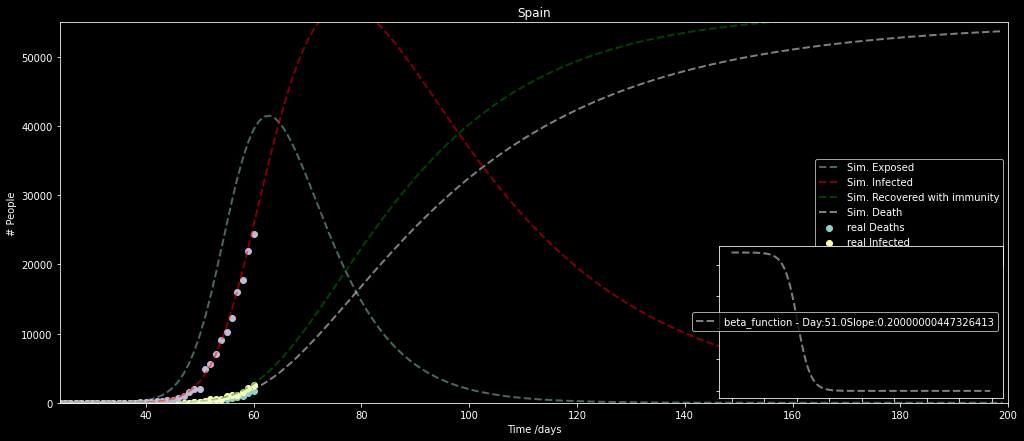

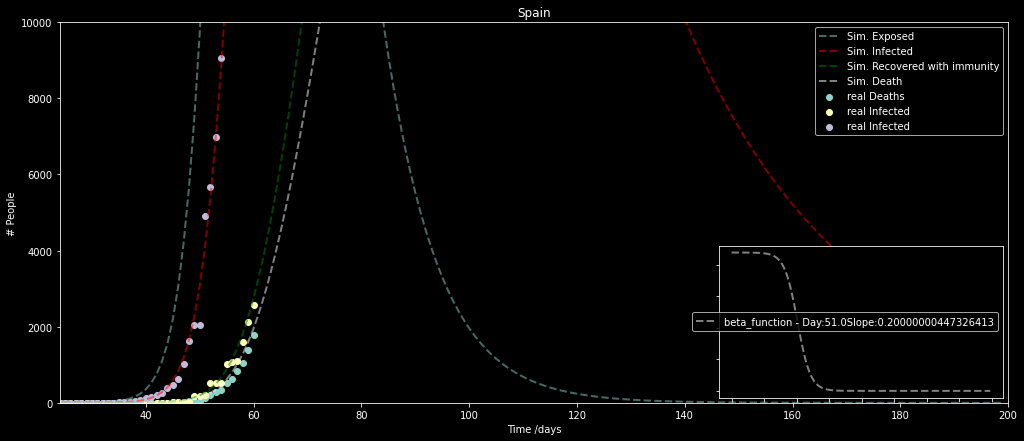

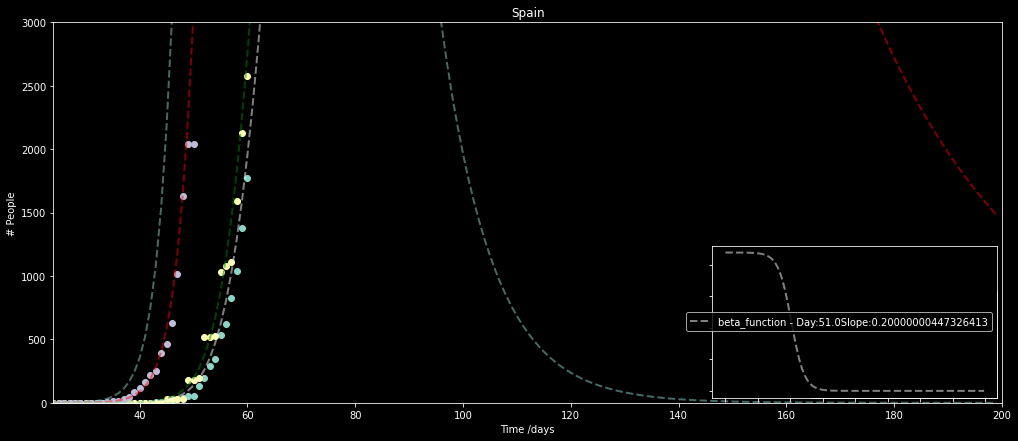

In [2]:
'''
Run beta-SIIERS exampe
'''

delta, gammaR, gammaD, mu, beta0, alpha, beta_t0, omega, epsilon, population  = 1/24, 1/24, 1/35, 0.48, 1.5, 1.0, 50.0, 0.0, 00.0, 46.66 * 1000000 * 0.006 
bounds = [(0,2000),(1/30,1),(1/24,1), (1/34,1), (0.001,1), (0.001,60), (0.2, 1.0), (51,51)]

Dates = {'Spain':{'3/8/20':['M8','-.'],'3/13/20':['Lockdown','--']},
'Italy':{'3/9/20':['Lockdown','--']},
'Hubai':{'1/23/20':['Lockdown','--']}}

simulator = SCovid19.siers_simulator('Spain', delta, gammaR, gammaD, mu, beta0, alpha, beta_t0, omega, epsilon, population, bounds)
simulator.load_data()
simulator.train()
simulator.plot_results(ylim = [0,55000])
simulator.plot_results(ylim = [0,10000])
simulator.plot_results(ylim = [0,3000])